# Activation and Loss Functions

Deep learning and Neural Nets seem to invoke an awe of science fiction and are only understood by 'rocket scientists' or those with PhD's in math and the sciences.  The reality is while in it's entirety these networks are complex, when you break them down into their individual parts, everything is significantly more digestible and can be easily understood at both an inutitive and technical sense.  So much so, that almost everything we will look at can be written in a single line of code. When broken down, neural networks are simply layers of functions solving a linear equation with a non-linear transformation separating each linear layer.  These non-linear transformations are called Activation Functions.  There are a few with intimidating sounding names, which will be break down and explain how each works in practice.

Additionally, the final layer of the network must produce some type of predictive results.  How we evaluate these results against what we expected is done with a Loss Function.  The objective of our modeling is to minimize this Loss Function.  Again, these functions are much simpler than they initially appear.

## Activation Functions

In order to visualize our activation functions, we will create an array of values to plot against each one.

In [121]:
#collapse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)

In [16]:
values = np.linspace(-5, 5, 100)

#### Binary Step

We will begin with the simplest of the activation functions called binary step.  This function will simply return an either/or result.  In our case, we will return 0 or 1, if our input is greater than 0.

In [23]:
def binary_step(inputs):
    return np.array([1 if i > 0 else 0 for i in values])

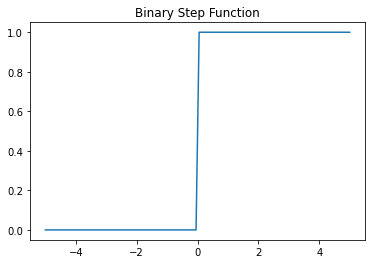

In [24]:
output = binary_step(values)

plt.plot(values, output)
plt.title("Binary Step Function");

#### Rectified Linear Unit (ReLU)

We will take this one step further with the Rectified Linear Unit.  This is similar to the Binary Step function, which the exception of returning the input if greater than a value instead of just 1.  Let's take a look

In [25]:
def rectified_linear_unit(inputs):
    return np.array([i if i > 0 else 0 for i in values])

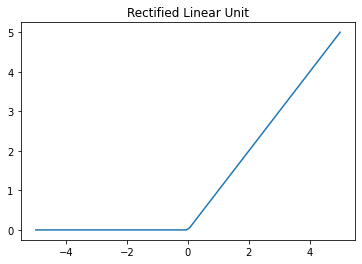

In [26]:
output = rectified_linear_unit(values)

plt.plot(values, output)
plt.title("Rectified Linear Unit");

#### Leaky ReLU

This will be similar to the Rectified Linear Unit, except that anything below 0 will have multiplied by a factor.  We will use 0.1.

In [38]:
def leaky_ReLU(inputs):
    return np.array([i if i > 0 else i*0.1 for i in values])

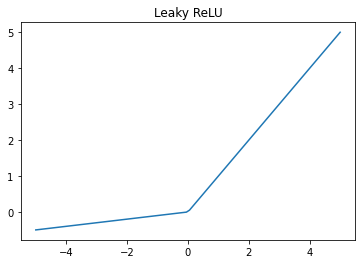

In [40]:
output = leaky_ReLU(values)

plt.plot(values, output)
plt.title("Leaky ReLU");

#### Sigmoid Function

Now we will move to some more complex function, albeit, still relatively simple when broken down.  The Sigmoid Function also known as the Logistic Function binds all of its' output between 0 and 1 in a smooth manner by using the formula $\frac{1}{1 + e^{-x}}$.

In [80]:
def sigmoid(inputs):
    return np.array([ (1 / (1 + np.exp(-i))) for i in inputs ])

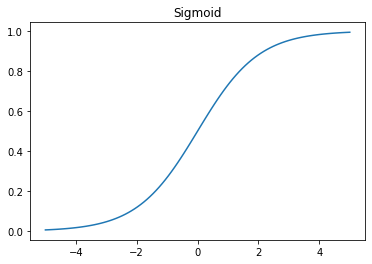

In [81]:
output = sigmoid(values)

plt.plot(values, output)
plt.title("Sigmoid");

In [31]:
def sigmoid(inputs):
    return np.array([ (1 / (1 + np.exp(-i))) for i in inputs ])

#### Tanh Function

The Hyperbolic Tangent Function results in something very similar to the Sigmoid Function with 2 excpetions.  1) It binds the output to between -1 and 1 and 2) it approaches the bounds much faster.

In [36]:
def tanh_func(inputs):
    return np.array([ np.tanh(i) for i in inputs])

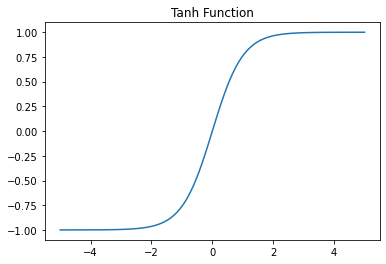

In [37]:
output = tanh_func(values)

plt.plot(values, output)
plt.title("Tanh Function");

#### Swish Function

This is a new function that has been developed by Google.  It is similar to the sigmoid, replacing 1 with the input in the numerator.  It has shown some improvement in practice.

In [43]:
def swish(inputs):
    return np.array([ (i / (1 + np.exp(-i))) for i in inputs ])

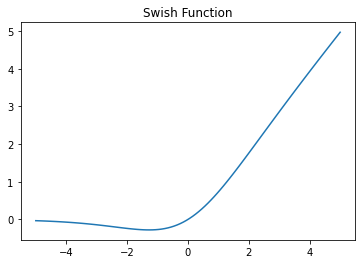

In [44]:
output = swish(values)

plt.plot(values, output)
plt.title("Swish Function");

## Loss Functions

Now we will take a look at various Loss Functions.  Again, a loss function is something that tells the model how well it is doing.  An important feature of the loss function is that is it continuous and that it can produce a stable derivative (gradient).  In an earlier blog post, we discuss gradient descent, which is how the model improves into parameters during training.  If a loss function produces zero or infinite gradients, then the model will not be able to improve its' parameters and we will be stuck with a non-optimal solution. Additional, which loss function we use, will depend on whether we are working with a Regression Problem, a Binary Classification problem or a Multi-Class Classification problem.  Let's take a look at each one.

### Regression Problems

In regression problems, we are looking to predict a number; the price of a home, the salary of an employee, sales of a product.  During training, we can test how close our predictions are to our target values.  We will show 3 commonly used loss functions for this:

* Mean Absolute Error

* Mean Squared Error

* Root Mean Squared Error

In order to illustrate our Loss Function we will use some simulated data.  We will created random normal target values, and then our predictions will simply be these target values with some additonal noise around them, created for the purpose of explaining the functions

In [55]:
np.random.seed(42)

targets = np.random.normal(100, 10, 5)
predictions = targets + np.random.normal(0, 10, 5)

pd.DataFrame({
    "Targets": targets,
    "Predictions": predictions
})

,Targets,Predictions
0,104.967142,102.625772
1,98.617357,114.409485
2,106.476885,114.151233
3,115.230299,110.535555
4,97.658466,103.084067


#### Mean Absolute Error (MAE)

As with each of our Regression loss function, the name just a good job explaining the loss function.  Here we will take the average over the absolute value of the difference between the target and prediction values for each observation.

You will sometimes see this referred to as L1 norm.

In [62]:
def mean_absolute_error(targets, predictions):
    return abs((targets - predictions)).mean()

In [61]:
mean_absolute_error(targets, predictions)

7.185637862260793

#### Mean Squared Error (MSE)

The reason we take the absolute value in MAE, is that we don't want high prediction error offsetting low prediction error negating each other, so we take the absolute value.  Another way to always have the error shown as a positive value is by squaring the error.  This loss function punishes worse predictions more. For example, a prediction off by 2 has a MSE of 4, but a prediction off by 4 has a mean squared error of 16.

In [63]:
def mean_squared_error(targets, predictions):
    error = targets - predictions
    return (error**2).mean()

In [64]:
mean_squared_error(targets, predictions)

73.04933789454411

#### Root Mean Squared Error (RMSE)

Now, the problem with MSE, is that it doesn't have an intuitive result.  If we then take the square root of MSE, we then arrive back at our base values for better explanative value.  MSE and RMSE will perform equally in practice.

RMSE, is also known as L2 norm.

In [67]:
def root_mean_squared_error(targets, predictions):
    return np.sqrt(mean_squared_error(targets, predictions))

In [68]:
root_mean_squared_error(targets, predictions)

8.546890539520447

### Classification Problems

Classification Problems can range from a variety of tasks.  Binary classification can include; have a disease or not, loan default or not, dog or cat.  Multi-class Classification can range from; breeds of dogs, identifying handwritten letters.  These different sets of problems, binary & multi-class, need different loss functions.  We will discuss one for each below.

### Binary Classification

#### Sigmoid

This is the same Sigmoid function that we discussed above in activation functions.  It is commonly used for binary classifcation since everything will fall nicely between 0 and 1.  It can be used to produce a probability like number for the first variable and then use (1-result) for the probability of the second number.

#### Multi-class Classification

Sigmoid function does a nice job for binary cases, but it won't work if you apply it across multiple categories.  We can see that the 3 items in each list do not add up to 1, we need to find another solution for multiple classes.

In [130]:
np.random.seed(42)
parameters = np.random.normal(0, 2, 15).reshape(5, 3)
parameters

array([[ 0.99342831, -0.2765286 ,  1.29537708],
       [ 3.04605971, -0.46830675, -0.46827391],
       [ 3.15842563,  1.53486946, -0.93894877],
       [ 1.08512009, -0.92683539, -0.93145951],
       [ 0.48392454, -3.82656049, -3.44983567]])

In [131]:
sigmoid(parameters)

array([[0.72976454, 0.43130504, 0.78505592],
       [0.95461211, 0.38501709, 0.38502487],
       [0.95923943, 0.82271766, 0.28111273],
       [0.74746169, 0.28356719, 0.28262871],
       [0.61867417, 0.02131997, 0.03077376]])

In [132]:
sigmoid(parameters).sum(axis=1)

array([1.94612551, 1.72465407, 2.06306983, 1.31365758, 0.6707679 ])

#### Softmax

The Softmax Function helps with this.  Here we simply raise each value to $e$ and calculated each parameters weight in the total of all the parameters.  You can see that here in the code written below.  Calculate the weight of each parameter forces the total to equal 1.

In [143]:
def softmax_detail(inputs):
    output = []
    for result in inputs:
        output.append( [np.exp(i) / np.exp(result).sum() for i in result] )
    return np.array(output)

In [144]:
softmax_detail(parameters)

array([[0.3797465 , 0.10664942, 0.51360408],
       [0.94381089, 0.02809409, 0.02809502],
       [0.82385052, 0.16246018, 0.0136893 ],
       [0.7893676 , 0.1055597 , 0.1050727 ],
       [0.96805704, 0.01299814, 0.01894482]])

In [145]:
softmax_detail(parameters).sum(axis=1)

array([1., 1., 1., 1., 1.])

Now that we have calculated the probabilities that sum to 1, we can subset out the results based on our target.  Below we have set 5 targeted in our random example, and show the code on how to subset out value for the targets.  This will be used in our loss function.

In [152]:
def softmax(inputs, targets):
    outputs = softmax_detail(inputs)
    idx = range(len(inputs))
    return outputs[idx, targets]

In [149]:
targets = np.array([1, 0, 0, 2, 0])

In [160]:
sm_preds = softmax(parameters, targets)
sm_preds

array([0.10664942, 0.94381089, 0.82385052, 0.1050727 , 0.96805704])

#### Negative Log Likelihood

Now that we have built up to Softmax we are going to finish up by reverting back to Loss Functions.

One of the drawbacks of both the sigmoid and softmax function is that they outputs we are generating are good for identifying the best predictions as the approach 1/0 quickly for each observation, however this reduces our ability to train the model as the gradient decreases dramatically as we approach these bounds, making improvements harder.  If we can then transform this back using the `log` function (the inverse of the exponential, it may improve the training of our model, and we can use this as an Loss Function.  One interest result by using the Negative Log of the Softmax function is that as the output approches 1, as seen below, the loss function will approach 0.  However, as the softmax output approaches 0, the loss function will approach $\infty$.

We can see the final loss function outputs below with the code.

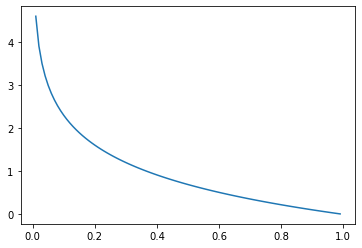

In [159]:
softmax_output = np.linspace(0.01, 0.99, 99)
neg_log_like = -np.log(softmax_output)

plt.plot(softmax_output, neg_log_like);

In [162]:
def neg_log_likelihood(inputs):
    return -np.log(sm_preds)

In [163]:
neg_log_likelihood(sm_preds)

array([2.23820826, 0.05782946, 0.19376618, 2.25310276, 0.03246427])

### Cross-Entropy

Combining the Softmax Function with Negative Log Likihood is called the Cross-Entropy Loss Function.  This is ideally used for Multi-class Classification.  Let's put the whole function together.

In [164]:
def cross_entropy(inputs, targets):
    output = []
    for result in inputs:
        output.append( [np.exp(i) / np.exp(result).sum() for i in result] )
    idx = range(len(inputs))
    outputs = np.array(output)
    preds = outputs[idx, targets]
    return -np.log(preds)

In [165]:
cross_entropy(parameters, targets)

array([2.23820826, 0.05782946, 0.19376618, 2.25310276, 0.03246427])

This was a focused discussion on Activation and Loss Functions used to build Deep Learning models.  Please see some of the other blog posts, we outline the other building blocks as well.